In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/My Drive/perros/Todo'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'perro' in filename:
      y.append(0) #indice 0 perro [perro,persona,casa]
    elif 'persona' in filename: #indice 1 persona
      y.append(1)
    elif 'casa' in filename: #indice 2 casa
      y.append(2)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [169]:
#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
#Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(812)
#Se establece un modelo neuronal
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) #3 es el numero de clases

In [170]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [171]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1]

In [172]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [173]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [174]:
X_train.shape

(26, 224, 224, 3)

In [175]:
#Verificamos el cambio
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [176]:
type(y_train)

numpy.ndarray

In [177]:
y_train.shape

(26, 3)

In [178]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
%time model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.2076 - accuracy: 0.3077
Epoch 2/20
1/1 [==============================] - 0s 381ms/step - loss: 42.3130 - accuracy: 0.3462
Epoch 3/20
1/1 [==============================] - 0s 394ms/step - loss: 90.1205 - accuracy: 0.3462
Epoch 4/20
1/1 [==============================] - 0s 387ms/step - loss: 33.2730 - accuracy: 0.3462
Epoch 5/20
1/1 [==============================] - 0s 356ms/step - loss: 42.1672 - accuracy: 0.3077
Epoch 6/20
1/1 [==============================] - 0s 361ms/step - loss: 35.0468 - accuracy: 0.3077
Epoch 7/20
1/1 [==============================] - 0s 371ms/step - loss: 13.0769 - accuracy: 0.6154
Epoch 8/20
1/1 [==============================] - 0s 476ms/step - loss: 20.1424 - accuracy: 0.3462
Epoch 9/20
1/1 [==============================] - 1s 555ms/step - loss: 1.6182 - accuracy: 0.8077
Epoch 10/20
1/1 [==============================] - 1s 553ms/step - loss: 8.6299 - accuracy: 0.5385
Epoch 11/20
1/1

In [179]:
%time y_train

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.82 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [180]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [181]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [182]:
print(y_test.shape)
print(X_test.shape)

(7,)
(7, 224, 224, 3)


In [183]:
#Verificamos su forma
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [184]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 [==============================] - 0s 89ms/step


In [185]:
#Revisamos el resultado
y_pred

array([[9.98284519e-01, 1.34604605e-09, 1.71543506e-03],
       [9.99982715e-01, 1.73288008e-05, 1.36795109e-08],
       [8.82821262e-01, 1.05642570e-07, 1.17178716e-01],
       [7.78037588e-07, 6.72157967e-13, 9.99999166e-01],
       [9.91325505e-05, 6.33725107e-01, 3.66175711e-01],
       [8.68201673e-01, 1.31798357e-01, 3.72833959e-08],
       [9.36672180e-08, 3.55003527e-20, 9.99999881e-01]], dtype=float32)

In [186]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [187]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.8571428571428571
Precisión por clase: [0.75 1.   1.  ] -> 0.9166666666666666
Sensibilidad por clase: [1.  0.5 1. ] -> 0.8333333333333334
F1 Score por clase: [0.85714286 0.66666667 1.        ] -> 0.8412698412698413


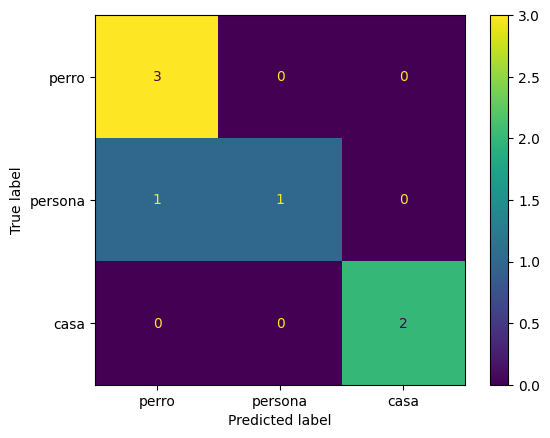

In [188]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['perro','persona','casa']
disp.plot()

In [189]:
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [190]:
y_pred

array([0, 0, 0, 2, 1, 0, 2])

In [191]:
X_test[5]

array([[[0.97254902, 0.97254902, 0.98039216],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       [[0.97254902, 0.97254902, 0.98039216],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       [[0.97254902, 0.97254902, 0.98039216],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       ...,

       [[0.92156863, 0.9254902 , 0.93333333],
        [0.92156863, 0.9254902 , 0.93333333],
        [0.92156863, 0

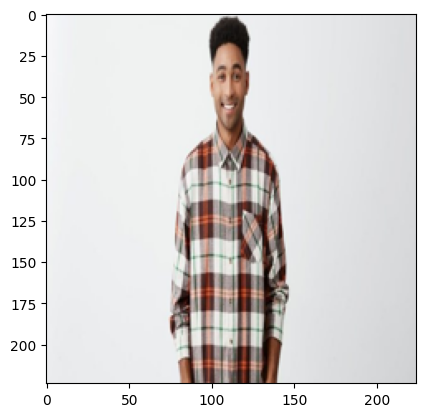

In [203]:
import matplotlib.pyplot as plt
img_array = (X_test[5] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)